# Z Transform


# plot of X[n] = z^n for different values of z

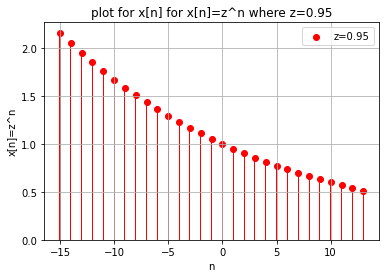

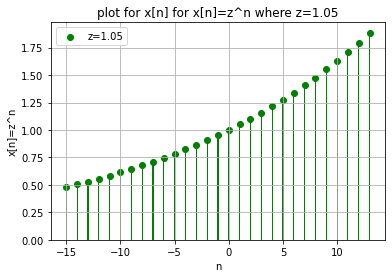

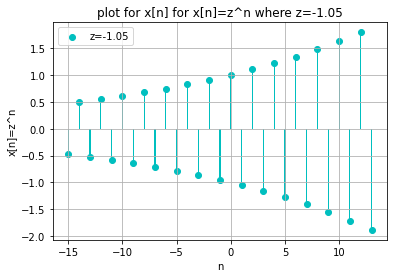

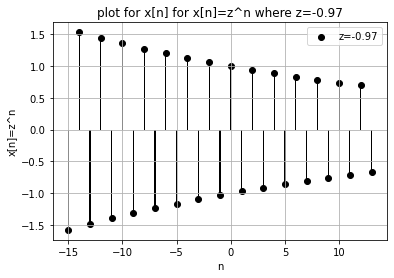

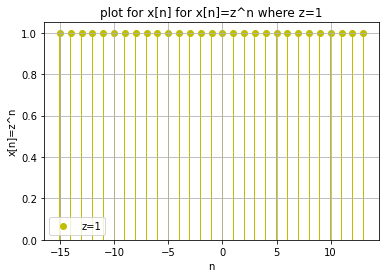

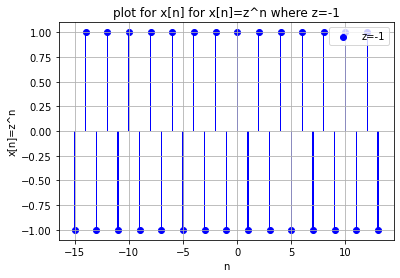

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import cmath

n=np.arange(-15,14,1)
z=[0.95,1.05,-1.05,-0.97,1,-1]
x={}
col=['r','g','c','k','y','b','m','r','g','c','k','y','b','m','r','g','c','k','y','b','m']
for i in z:
    p="x_"+str(i)
    x[p]=[]
r=0
for key in x:
    for i in n:
        if i<0:
            x[key].append(1/pow(z[r],-i))
        else:
            x[key].append(pow(z[r],i))
    r+=1
fig=1
r=0
for key in x:
    plt.figure(fig)
    labl="z="+str(z[r])
    titl="plot for x[n] for x[n]=z^n where z="+str(z[r])
    plt.scatter(n,x[key],color=col[r],label=labl)
    plt.bar(n,x[key],color=col[r],width=0.1)
    plt.xlabel('n')
    plt.ylabel('x[n]=z^n')
    plt.title(titl)
    plt.grid("True")
    r+=1
    fig+=1
    plt.legend()
    plt.show()

# 3-D plot of X[n] = z^n for different value of complex Z

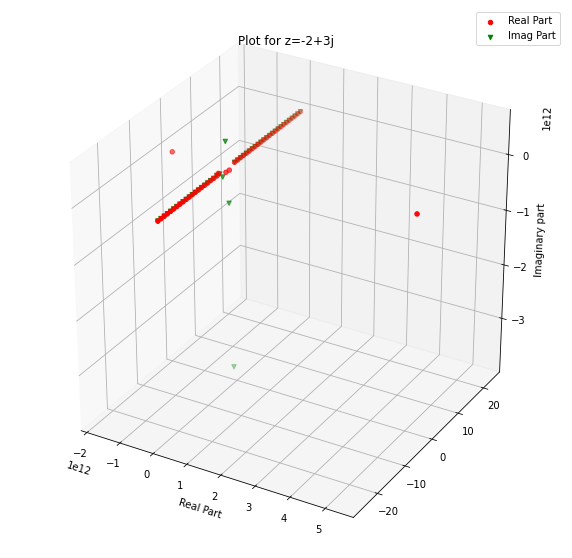

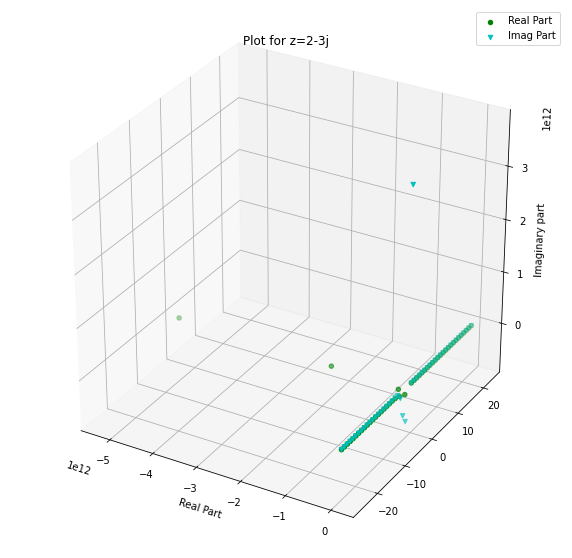

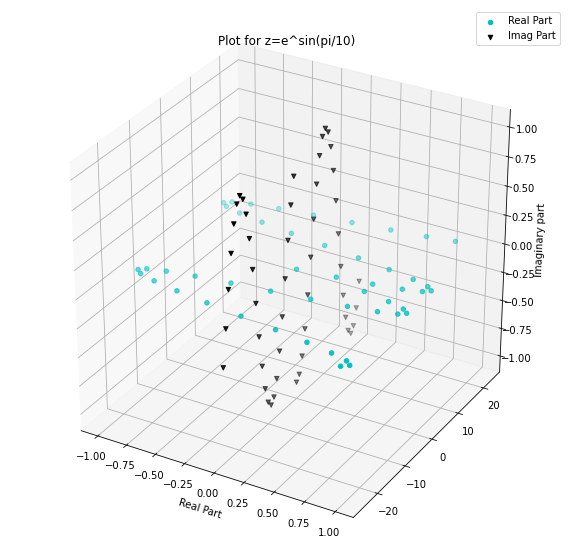

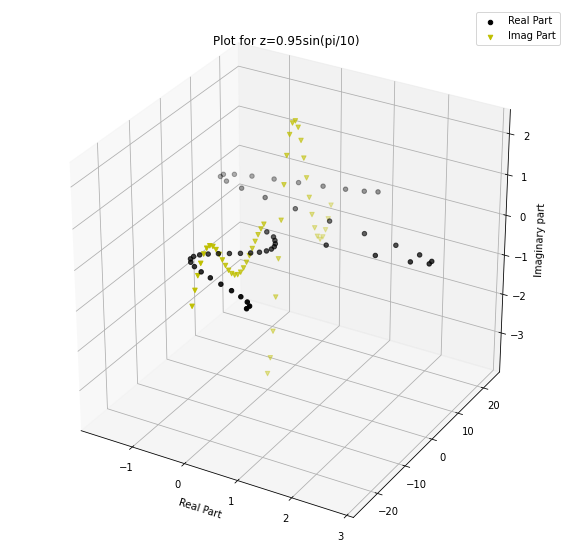

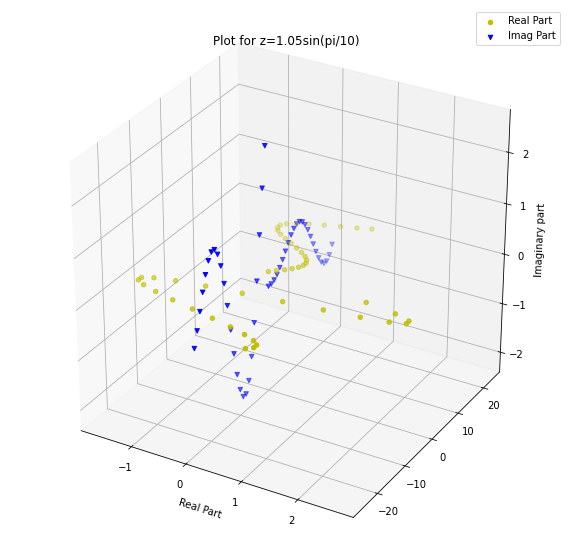

In [44]:
y={}
col=['r','g','c','k','y','b','m','r','g','c','k','y','b','m','r','g','c','k','y','b','m']
s=complex(np.cos(np.pi/10),np.sin(np.pi/10))
y_re={}
y_im={}
z=[complex(-2,3),complex(2,-3),s,0.95*s,1.05*s]
zlabel=["z=-2+3j","z=2-3j","z=e^sin(pi/10)","z=0.95sin(pi/10)","z=1.05sin(pi/10)"]
for i in z:
    p="y_"+str(i)
    y[p]=[]
    y_re[p]=[]
    y_im[p]=[]
r=0
n=np.arange(-25,24,1)
for key in y:
    for i in n:
        if i<0:
            y[key].append(1/pow(z[r],-i))
        else:
            y[key].append(pow(z[r],i))
    r+=1
for key in y:
    for i in n:
        y_re[key].append(y[key][i].real)
        y_im[key].append(y[key][i].imag)
r=0

for key in y:
    figu = plt.figure(fig,figsize=(10,10))
    ax = figu.add_subplot(111, projection='3d')
    ax.scatter(y_re[key],n, 0, c=col[r], marker='o',label="Real Part")
    titl="Plot for "+str(zlabel[r])
    ax.scatter(0,n, y_im[key], c=col[r+1], marker='v',label="Imag Part")
    ax.set_xlabel("Real Part")
    ax.set_zlabel("Imaginary part")
    fig+=1
    r+=1
    ax.legend()
    ax.set_title(titl)
    plt.show()

# for system X[n] = 2x[n-3]

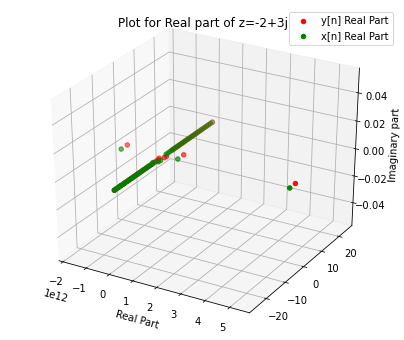

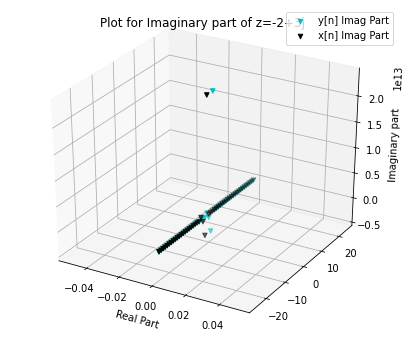

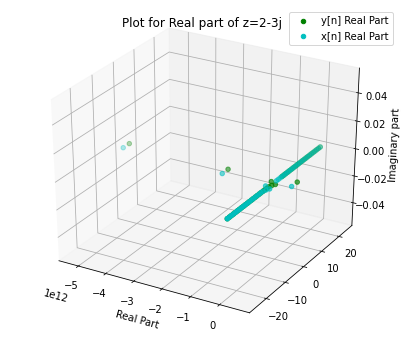

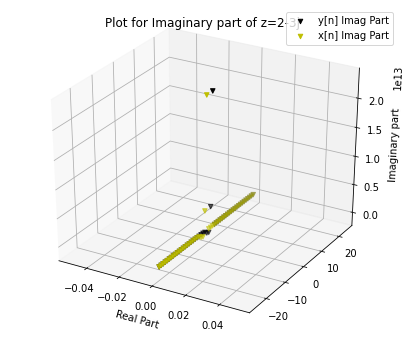

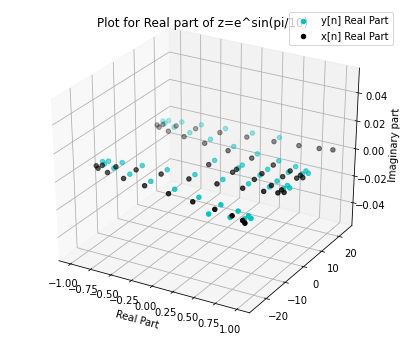

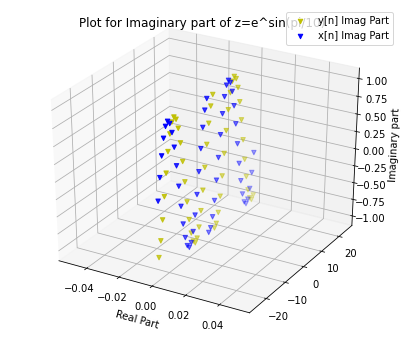

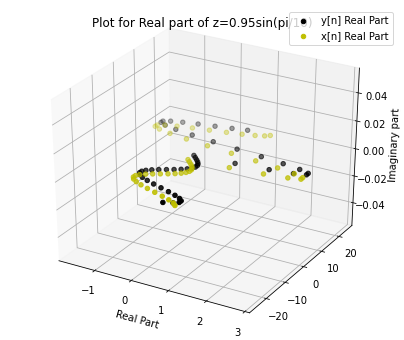

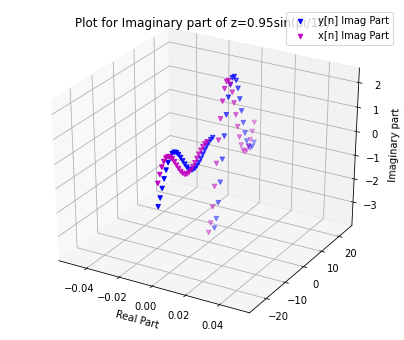

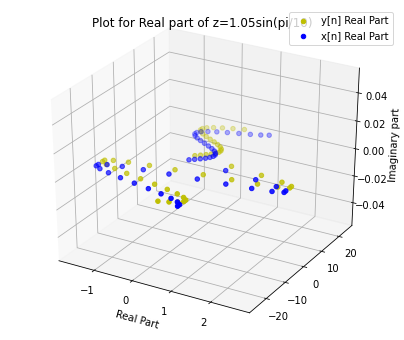

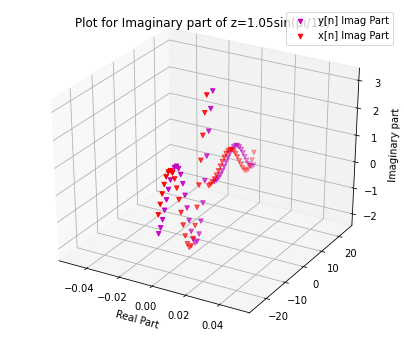

In [45]:
s=complex(np.cos(np.pi/10),np.sin(np.pi/10))
col=['r','g','c','k','y','b','m','r','g','c','k','y','b','m','r','g','c','k','y','b','m']
x={}
y={}
y_re={}
y_im={}
x_re={}
x_im={}
z=[complex(-2,3),complex(2,-3),s,0.95*s,1.05*s]
zlabel=["z=-2+3j","z=2-3j","z=e^sin(pi/10)","z=0.95sin(pi/10)","z=1.05sin(pi/10)"]
for i in z:
    p=str(i)
    x[p]=[]
    y[p]=[]
    y_re[p]=[]
    y_im[p]=[]
    x_re[p]=[]
    x_im[p]=[]
r=0
n=np.arange(-25,25,1)
for key in x:
    for i in n:
        if i<0:
            x[key].append(1/pow(z[r],-i))
        else:
            x[key].append(pow(z[r],i))
    r+=1
r=0
for key in x:
    for i in range(len(n)):
        if i-3<0:
            y[key].append(x[key][i-3+len(n)])
        else:
            y[key].append(x[key][i-3])
for key in x:
    for i in n:
        x_re[key].append(x[key][i].real)
        x_im[key].append(x[key][i].imag)
        y_re[key].append(y[key][i].real)
        y_im[key].append(y[key][i].imag)
r=0
for key in y:
    figu = plt.figure(fig,figsize=(7,6))
    titl1="Plot for Real part of "+str(zlabel[r])
    ax = figu.add_subplot(111, projection='3d')
    ax.scatter(y_re[key],n, 0, c=col[r], marker='o',label="y[n] Real Part")
    ax.scatter(x_re[key],n, 0, c=col[r+1], marker='o',label="x[n] Real Part")
    ax.set_xlabel("Real Part")
    ax.set_zlabel("Imaginary part")
    ax.legend()
    ax.set_title(titl1)
    fig+=1
    figu2 = plt.figure(fig,figsize=(7,6))
    titl2="Plot for Imaginary part of "+str(zlabel[r])
    ax2 = figu2.add_subplot(111, projection='3d')
    ax2.scatter(0,n, y_im[key], c=col[r+2], marker='v',label="y[n] Imag Part")
    ax2.scatter(0,n, x_im[key], c=col[r+3], marker='v',label="x[n] Imag Part")
    ax2.set_xlabel("Real Part")
    ax2.set_zlabel("Imaginary part")
    ax2.legend()
    ax2.set_title(titl2)
    fig+=1
    r+=1
    plt.show()

# Discrete time Fourier Series 

# Discrete time fourier series coefficient calculation

In [10]:
def dtfs_coeffn(xn,N):
    cn = list()
    for n in range(N):
        sum=0
        for k in range(N):
            sum+=xn[k]*np.exp(complex(0,(2*np.pi*k*n)/N))
        cn.append(np.round(sum/N,3))
    return cn


# discrete time Fourier series

In [40]:
def dtfs(xn,N):
    cn = dtfs_coeffn(xn,N)
    xk = list()
    for k in range(N):
        sum=0
        for n in range(N):
            sum+=cn[n]*exp(complex(0,(2*np.pi*k*n)/N))
        xk.append(np.round(sum,3))
    return xk


fourier coefficient is [(0.438+0j), (0.12+0.29j), (-0.044+0.044j), (0.086+0.036j), 0.063j, (0.039-0.016j), (0.044+0.044j), (0.005-0.011j), (0.062-0j), (0.005+0.011j), (0.044-0.044j), (0.039+0.016j), (-0-0.062j), (0.086-0.036j), (-0.044-0.044j), (0.12-0.29j)]


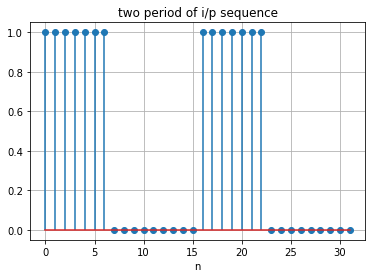

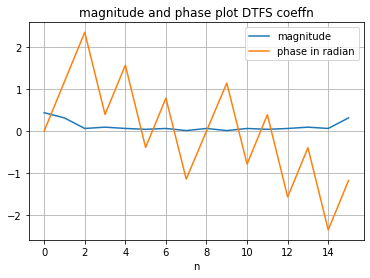

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

xn1 = [1 for i in range(7)]
xn2 = [0 for i in range(16-7)]
xn = xn1+xn2
plt.figure(1)
plt.grid('True')
plt.stem(xn+xn,use_line_collection=True)
plt.title("two period of i/p sequence")
plt.xlabel('n')
Cn =dtfs_coeffn(xn,16)
print('fourier coefficient is', Cn)
plt.figure(2)
plt.plot([abs(i) for i in Cn],label = "magnitude")
plt.plot([cmath.phase(i) for i in Cn],label ="phase in radian")
plt.title('magnitude and phase plot DTFS coeffn')
plt.xlabel('n')
plt.legend()
plt.grid('True')
plt.show()

# Continuous Time Fourier Transform

C:\Users\YASH\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


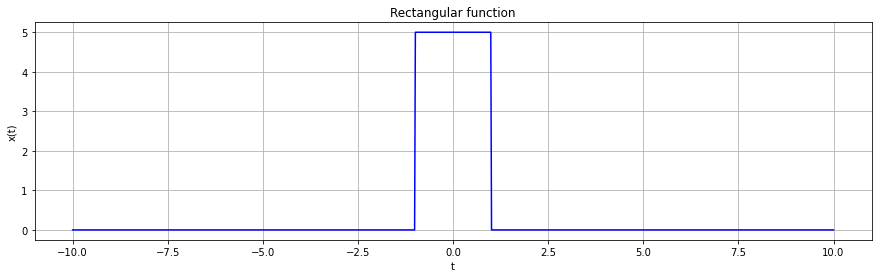

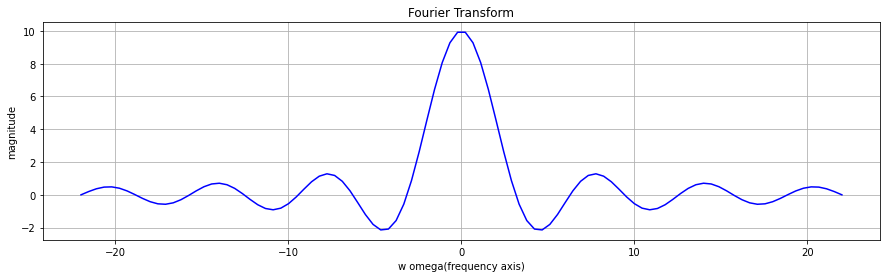

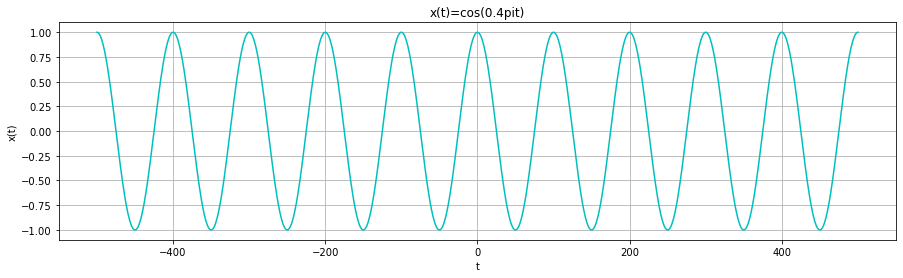

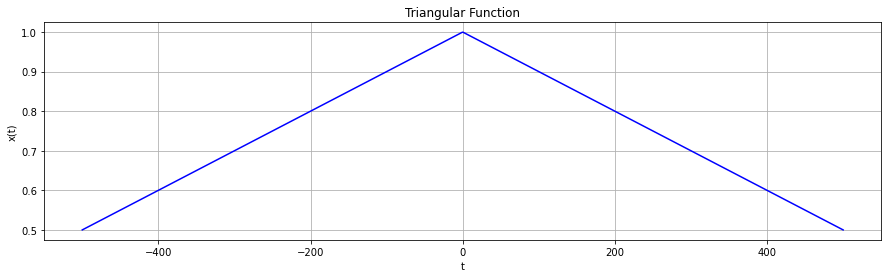

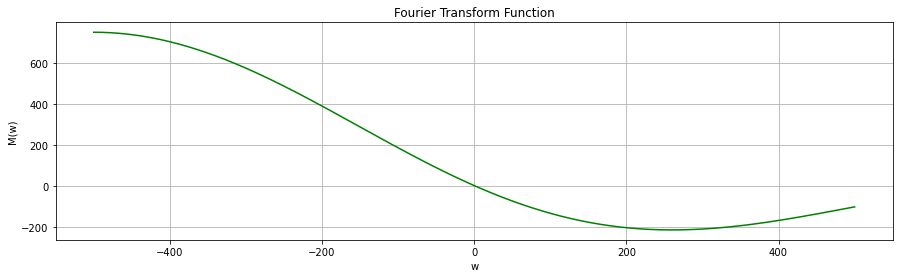

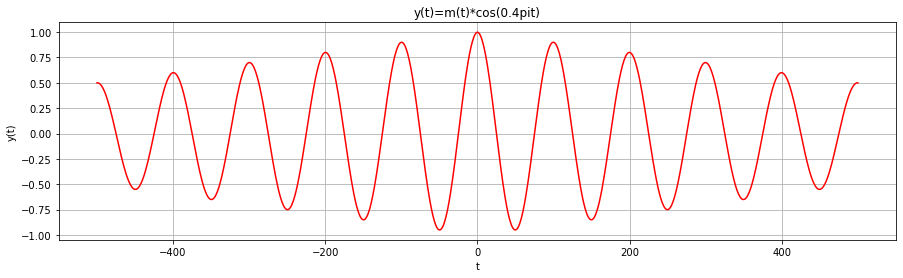

In [42]:
def ctft1(fun,t1):
    N=len(fun)
    pi=np.pi
    p=2*pi/N
    y=[]
    for k in range(len(t1)):
        y.append(0)
        for n in range(len(fun)):
            s=p*k/1000
            w=complex(np.cos(s*n)*fun[n],np.sin(s*n)*fun[n])
            y[k]+=w
    return y
t=-np.linspace(-10,10,1000)
Rect=5*(abs(t)<=1)
fig+=1
plt.figure(fig,figsize=(15,4))
plt.plot(t,Rect,"b")
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Rectangular function')
plt.grid(True)
fig+=1
w=np.linspace(-7*np.pi,7*np.pi,100)
ctft=5*2*np.sin(w*2/2)/w
plt.figure(fig,figsize=(15,4))
plt.title('Fourier Transform')
plt.plot(w,ctft,color='b')
plt.grid('True')
plt.xlabel("w omega(frequency axis)")
plt.ylabel("magnitude")
fig+=1
plt.figure(fig,figsize=(15,4))
plt.grid('True')
t=np.linspace(-500,500,1000)
fc=0.01
Carr=np.cos(2*np.pi*fc*t)
plt.plot(t,Carr,color='c')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('x(t)=cos(0.4pit)')
fig+=1
t=np.linspace(-500,500,1000)
plt.figure(fig,figsize=(15,4))
m=1-abs(t)/1000
m_ctft=ctft1(m,t)
plt.plot(t,m,color='b')
plt.grid('True')
plt.title('Triangular Function')
plt.xlabel('t')
plt.ylabel('x(t)')
fig+=1
plt.figure(fig,figsize=(15,4))
plt.plot(t,m_ctft,color='g')
plt.grid('True')
plt.title('Fourier Transform Function')
plt.xlabel('w')
plt.ylabel('M(w)')
y=Carr*m
fig+=1
plt.figure(fig,figsize=(15,4))
plt.plot(t,y,color='r')
plt.title('y(t)=m(t)*cos(0.4pit)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid('True')
plt.show()